# Lending Club Case Study

Group Study by Jonathan DSilva and Pratik Kaviya

## Business Understanding
We are working for a __consumer finance company__ which specializes in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

There are two __types of risks__ are associated with the bank’s decision:<br>
-  If the applicant is __likely to repay the loan,__ then not approving the loan results in a loss of business to the company
-  If the applicant is __not likely to repay the loan,__ i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.<br>
The company wants to understand the __driving factors__ (__or driver variables__) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.<br>

#### Import the necessary libraries

In [1]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')

#### Load the data

In [2]:
df=pd.read_csv("loan.csv")

#### Problem Statement
To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

#### Exploring the data using various parameters.

In [3]:
# View the first five rows of the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# View the last five rows of the data
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# get the total rows and columns of the data
df.shape

(39717, 111)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Investigate and fix missing value

In [7]:
# Missing Value Check in percentage
df1=100*df.isnull().mean()

In [8]:
# Listing columns with missing value greater than 10%
df1.loc[(df1.values > 10) & (df1.values <= 100)].sort_values()

desc                               32.585543
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi    

In [9]:
# Dropping columns missing more than 30% of data
df.drop(columns=list(df1[df1.values > 30].index),inplace=True)

In [10]:
# get the total rows and columns of the data after dropping columns missing more than 30% of data
df.shape

(39717, 53)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

##### From __111__ columns, we are now down to __53__ columns
##### We can also drop columns with single value as they will be of no use for our analysis.


In [12]:
# Identifying columns with single value
col_uniq=df.nunique()
col_uniq[col_uniq.values == 1]

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [13]:
# Dropping columns with single value
df.drop(columns=list(col_uniq[col_uniq.values == 1].index),inplace=True)

In [14]:
# get the total rows and columns of the data after dropping columns with single value
df.shape

(39717, 44)

##### from __111__ columns , we have come down to __44__ collumns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [16]:
df.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc 

##### Since the objective is to identify __risky loan applications__, any column which is created after the loan application was approved doesn't make sense for our analysis towards the business objective. Similarly columns like "id", "member_id" & "url" are different for each application. While the column "zip_code" could have been a useful driver, but it contains only partial data which might affect our analysis negatively. Hence we will drop the columns "id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv", "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee"   "last_pymnt_d","last_pymnt_amn and ","last_credit_pull_d"

In [17]:
drop_col = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
df.drop(columns=drop_col, inplace=True)

In [18]:
df.shape

(39717, 28)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [20]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


In [21]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [22]:
100*df.isnull().mean()

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.191303
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.027696
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

#### Data preparation

In [23]:
# analyse the 'loan_status' column

In [24]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

###### The "Current" loan status does not give any information for our analysis for approving or rejecting application, so dropping this data makes sense.

In [25]:
df = df[~(df['loan_status'] == 'Current')]

In [26]:
df.shape

(38577, 28)

In [27]:
#let us calculate the percentage of loans paid vs charged off for all the records for further analysis later
loan_status_percent = df['loan_status'].value_counts(normalize=True)
loan_status_percent

loan_status
Fully Paid     0.854136
Charged Off    0.145864
Name: proportion, dtype: float64

In [28]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
df['loan_status_num'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [29]:
# analyse the 'term' column

In [30]:
df['term'].value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [31]:
#Converting 'term' to numeric variable "tern_in_months"
df['term_in_months']=df['term'].apply(lambda x: pd.to_numeric(x.split()[0]))

In [32]:
df['term_in_months'].value_counts()

term_in_months
36    29096
60     9481
Name: count, dtype: int64

In [33]:
df.drop(columns=['term'], inplace=True)

In [34]:
# analyse the 'int_rate' column

In [35]:
df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [36]:
# Removing the '%' symbol
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [37]:
# analyse the 'grade' column

In [38]:
df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [39]:
# analyse the 'sub_grade' column

In [40]:
df['sub_grade'].value_counts()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

In [41]:
# analyse the 'emp_title' column

In [42]:
print(df['emp_title'].value_counts().head())

emp_title
US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: count, dtype: int64


In [43]:
print(df['emp_title'].unique().shape)

(28028,)


In [44]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [45]:
df['emp_length'].isnull().sum()

1033

In [46]:
# analyse the 'home_ownership' column

In [47]:
df['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [48]:
# analyse the 'verification_status' column

In [49]:
df['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [50]:
# analyse the 'issue_d' column

In [51]:
df['issue_d'].value_counts()

issue_d
Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
Aug-08      71
May-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [52]:
# Splitting the month and year into new columns issue_year and issue_month
df['issue_month'] = df['issue_d'].apply(lambda x: (x.split("-")[0]))

In [53]:
df['issue_year'] = df['issue_d'].apply(lambda x: pd.to_numeric(x.split("-")[1]))

In [54]:
df['issue_month'].value_counts()

issue_month
Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: count, dtype: int64

In [55]:
df['issue_year'].value_counts()

issue_year
11    20516
10    11532
9      4716
8      1562
7       251
Name: count, dtype: int64

In [56]:
# Now that we have split 'issue_d' into issue_year and issue_month we can drop 'issue_d'
df.drop(columns=['issue_d'], inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   int_rate              38577 non-null  float64
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_title             36191 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  title                 38566 non-null  object 
 15  addr_state            38

In [58]:
# analyse the 'purpose' column

In [59]:
df['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [60]:
# analyse the 'title' column

In [61]:
df['title'].value_counts()

title
Debt Consolidation         2090
Debt Consolidation Loan    1620
Personal Loan               641
Consolidation               491
debt consolidation          478
                           ... 
Rainy Day                     1
family auto                   1
Karen's Freedom Loan          1
Payoff Cap1 Balance           1
Citibank is Satan             1
Name: count, Length: 19297, dtype: int64

In [62]:
df['title'].nunique()

19297

In [63]:
# Dropping title column since it has too many unique values
df.drop(columns=['title'], inplace=True)

In [64]:
# analyse the 'addr_state' column

In [65]:
df['addr_state'].value_counts()

addr_state
CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [66]:
# analyse the 'earliest_cr_line' column

In [67]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Jun-68      1
Feb-66      1
Dec-61      1
Oct-68      1
Oct-74      1
Name: count, Length: 524, dtype: int64

In [68]:
df['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Nov-04', 'Jul-05',
       'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89', 'Jul-03',
       'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03', 'Jan-01',
       'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01', 'Feb-02',
       'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Apr-05', 'Oct-07',
       'Dec-00', 'Apr-07', 'Jan-03', 'Mar-94', 'Sep-98', 'Jun-04',
       'Nov-95', 'Jul-99', 'Jun-95', 'Sep-92', 'Jan-02', 'Apr-92',
       'Oct-06', 'May-00', 'Dec-98', 'Dec-04', 'Oct-00', 'May-02',
       'May-06', 'Jul-02', 'Jul-06', 'May-97', 'Oct-05', 'Apr-95',
       'Oct-02', 'Jan-00', 'Apr-00', 'Dec-94', 'Sep-05', 'Dec-84',
       'Dec-99', 'Nov-03', 'Jun-89', 'Jun-03', 'Oct-96', 'May-03',
       'Jun-02', 'Jun-07', 'Dec-96', 'Sep-02', 'Jan-86', 'May-98',
       'Jan-97', 'Jun-05', 'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94',
       'Jun-92', 'Mar-97', 'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00',
       'Feb-01', 'Dec-88', 'Feb-99', 'Dec-91', 'Aug-00', 'Oct-

##### Since the year is a 2 digit and not compliant with Y2K, we can derive a new value "days_from_earliest_cr_line" to extract meaningful data.

In [69]:
from datetime import datetime
today = datetime.today()
today.year

def days_from_earliest_cr_line (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days

df['days_from_earliest_cr_line'] = df['earliest_cr_line'].apply(days_from_earliest_cr_line)

In [70]:
df['days_from_earliest_cr_line'].value_counts()

days_from_earliest_cr_line
8986     360
9320     357
8620     341
9290     340
9655     318
        ... 
20430      1
21281      1
22804      1
20308      1
18117      1
Name: count, Length: 524, dtype: int64

In [71]:
# we can now drop 'earliest_cr_line'
df.drop(columns=['earliest_cr_line'], inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   int_rate                    38577 non-null  float64
 4   installment                 38577 non-null  float64
 5   grade                       38577 non-null  object 
 6   sub_grade                   38577 non-null  object 
 7   emp_title                   36191 non-null  object 
 8   emp_length                  37544 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_inc                  38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  loan_status                 38577 non-null  object 
 13  purpose                     38577 no

In [73]:
# analyse the 'revol_util' column
df['revol_util'].value_counts()

revol_util
0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
8.46%       1
37.63%      1
32.71%      1
0.86%       1
16.02%      1
Name: count, Length: 1088, dtype: int64

In [74]:
#let us convert these values in numberics by removing %
df['revol_util'] = pd.Series(df['revol_util']).str.replace('%', '').astype(float)

In [75]:
df['revol_util'].info()

<class 'pandas.core.series.Series'>
Index: 38577 entries, 0 to 39716
Series name: revol_util
Non-Null Count  Dtype  
--------------  -----  
38527 non-null  float64
dtypes: float64(1)
memory usage: 602.8 KB


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   int_rate                    38577 non-null  float64
 4   installment                 38577 non-null  float64
 5   grade                       38577 non-null  object 
 6   sub_grade                   38577 non-null  object 
 7   emp_title                   36191 non-null  object 
 8   emp_length                  37544 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_inc                  38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  loan_status                 38577 non-null  object 
 13  purpose                     38577 no

## Univariate Analysis

In [77]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_status_num,term_in_months,issue_month,issue_year,days_from_earliest_cr_line
0,5000,5000,4975.0,10.65,162.87,B,B2,NaN,10+ years,RENT,...,0,13648,83.7,9,0.0,0,36,Dec,11,14372
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,...,0,1687,9.4,4,0.0,1,60,Dec,11,9169
2,2400,2400,2400.0,15.96,84.33,C,C5,NaN,10+ years,RENT,...,0,2956,98.5,10,0.0,0,36,Dec,11,8224
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,0,5598,21.0,37,0.0,0,36,Dec,11,10324
5,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,0,7963,28.3,12,0.0,0,36,Dec,11,7128


#### Loan status vs Numerical continuous variables

In [78]:
# compare the loan_status fields with all the numerical variable.

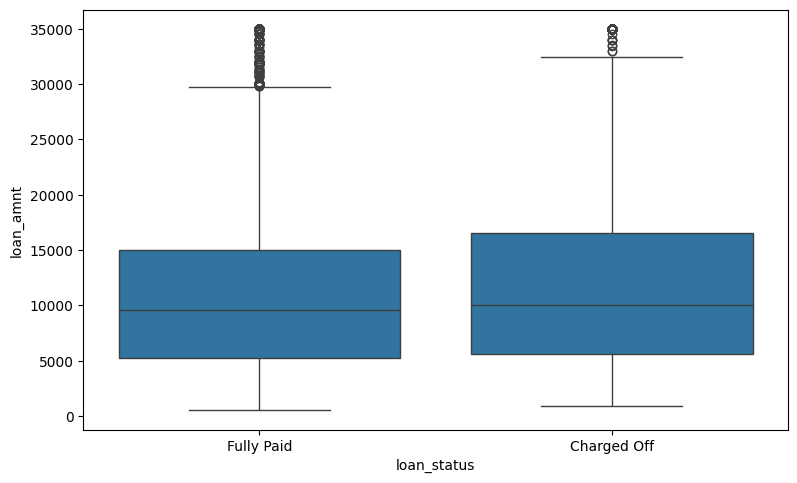

In [79]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)
plt.show()

In [80]:
df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [81]:
# There is huge difference between mean and median . let us limit our data to 75%
loan_till75 = df.loc[(df['loan_amnt']<=15000)]

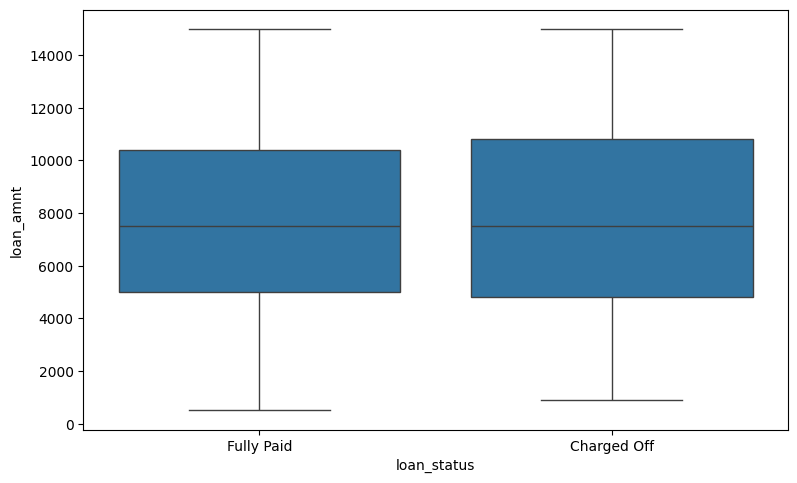

In [82]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till75)
plt.show()

In [83]:
# Let is take look at loan_amnt data above 75%
loan_above75 = df.loc[(df['loan_amnt']>=15000)]

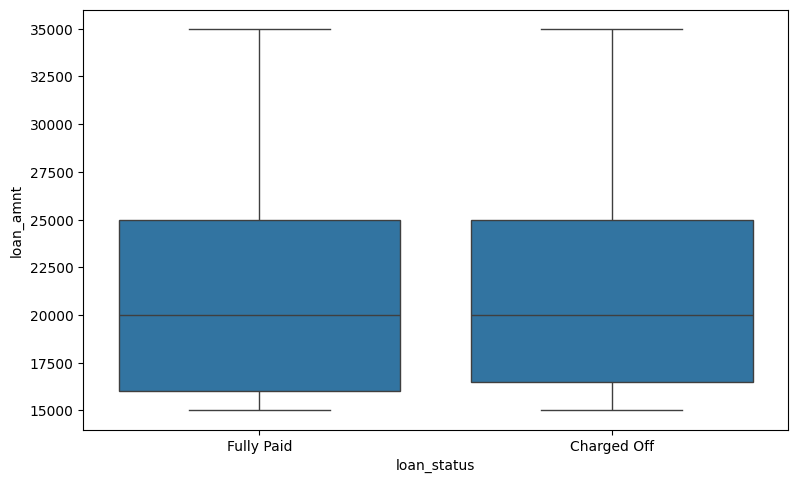

In [84]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above75)
plt.show()

##### From above box plot we can conclude that "higher the loan amount" will tend to "Write off"

In [85]:
# Since we have too many columns for univariate analysis let us define some default functions, so that we can re-use the same function for all the columns.

In [86]:
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']

In [87]:
def PercentileCut (*, data=df, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'df'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [88]:
def Univariate_Categorical (*, data=df, column, title=None, figsize=(10,10), grp_comparison=True, box_plot=False,
                            pct_comparison=False, filter=None, disp_filter = None):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            column : need to provide the numerical column for comparison
            figsize : a default have is given, but can be overridden
            loan_status_pct : a global variable, which is referred here for the percentage comparison
            grp_comparison : with this as true, it groups the data based on the categories and compares
            pct_comparison : this will call the Pct_Comparison method and below couple parameters will be applicable for it
            filter : any conditions based on which the data will be filtered before plotting, ignored if None
            disp_filter : string for display purpose only, valid if filter is not None
        Returns:
            None, does a countplot and a box plot as well, if needed
    """
    from IPython.core.display import display, HTML
    plotdata = data if filter is None else data.loc[filter]
        
    if pct_comparison and filter is not None:
        Pct_Comparison(filter, disp_filter)

    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
                      order=plotdata[column].value_counts().index, hue_order=order)
        if title is not None:
            plt.title(title)
        plt.show()
        
        df = data.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = data.groupby([column])[by].count()
        df = df.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()

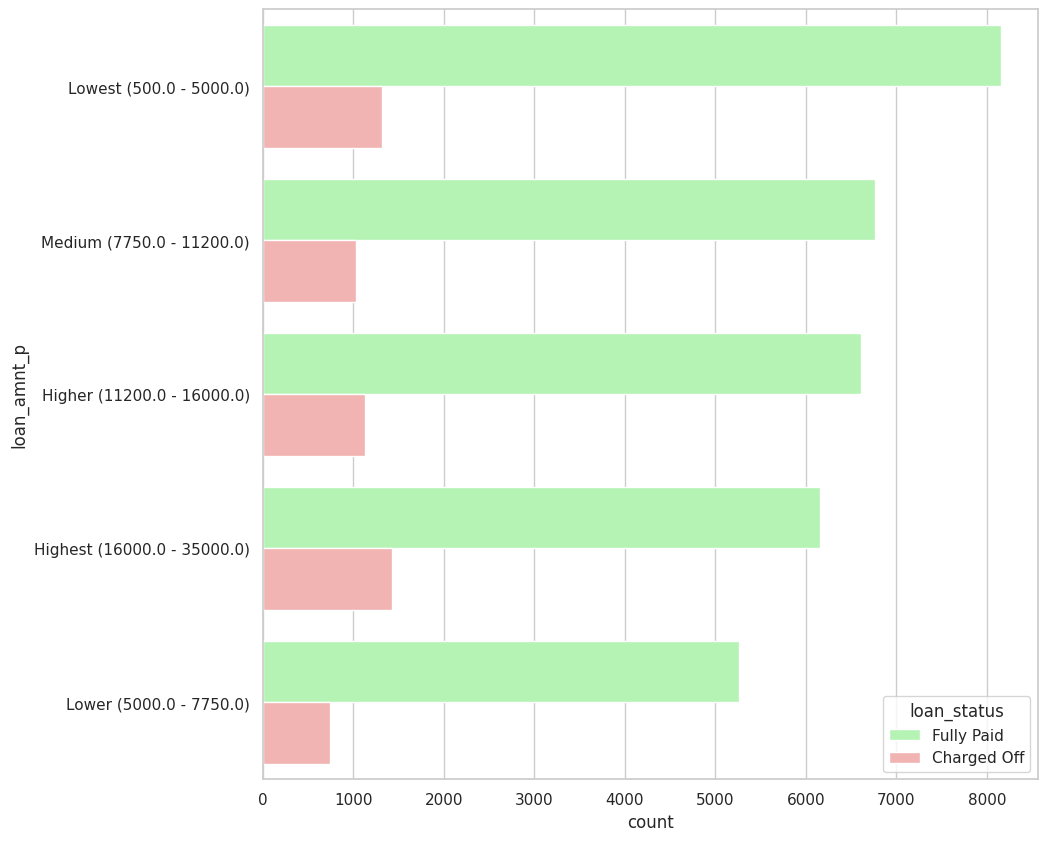

loan_amnt_p,Charged off %,Record count
Highest (16000.0 - 35000.0),0.187624,7579
Higher (11200.0 - 16000.0),0.145368,7739
Lowest (500.0 - 5000.0),0.138725,9472
Medium (7750.0 - 11200.0),0.131613,7788
Lower (5000.0 - 7750.0),0.123521,5999


In [89]:
PercentileCut(column='loan_amnt')
Univariate_Categorical(column='loan_amnt_p')

##### Observation: Higher the loan amount, greater the chance of the loan getting default.

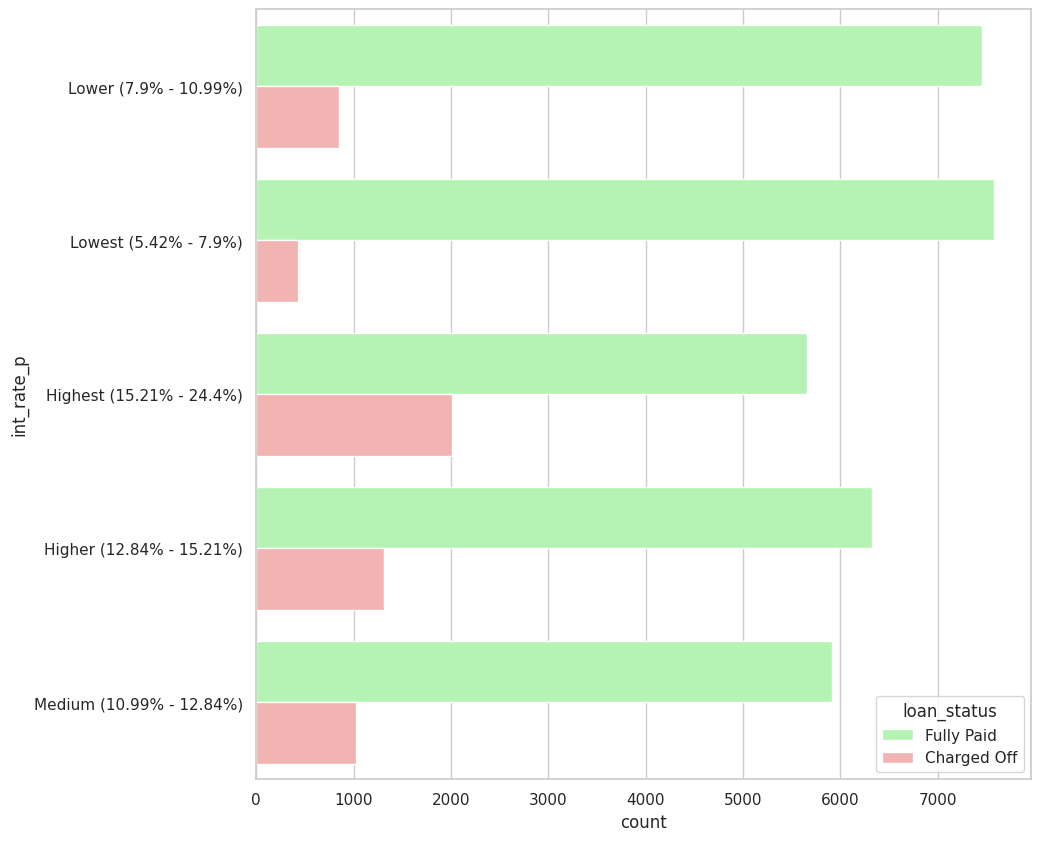

int_rate_p,Charged off %,Record count
Highest (15.21% - 24.4%),0.262150,7675
Higher (12.84% - 15.21%),0.171619,7639
Medium (10.99% - 12.84%),0.146995,6939
Lower (7.9% - 10.99%),0.102876,8311
Lowest (5.42% - 7.9%),0.053538,8013


In [90]:
PercentileCut(column='int_rate', trailer='%')
Univariate_Categorical(column='int_rate_p')

##### Observation: Higher the interest rate leads to higher charged off percentage

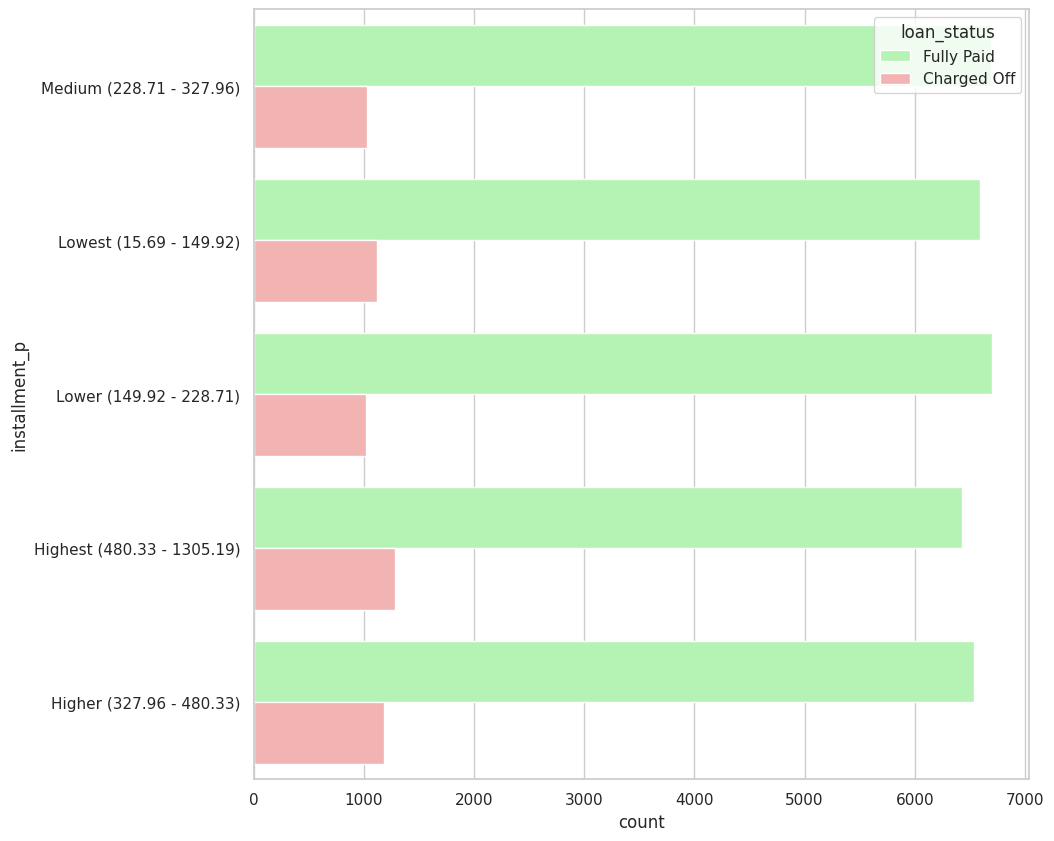

installment_p,Charged off %,Record count
Highest (480.33 - 1305.19),0.166321,7714
Higher (327.96 - 480.33),0.152988,7713
Lowest (15.69 - 149.92),0.145153,7716
Medium (228.71 - 327.96),0.132936,7718
Lower (149.92 - 228.71),0.131934,7716


In [91]:
PercentileCut(column='installment')
Univariate_Categorical(column='installment_p')

##### Observation: Higher installment amounts, the higher is the charged off percentage.

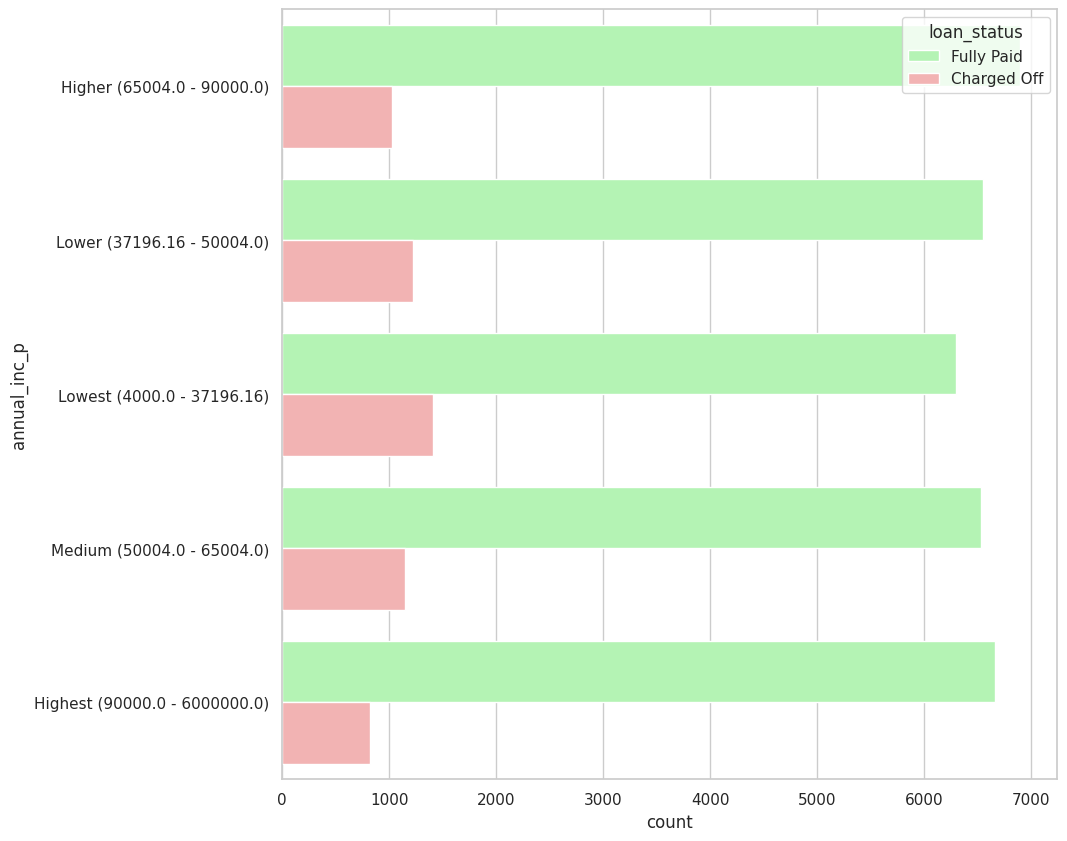

annual_inc_p,Charged off %,Record count
Lowest (4000.0 - 37196.16),0.183126,7716
Lower (37196.16 - 50004.0),0.156926,7768
Medium (50004.0 - 65004.0),0.149629,7679
Higher (65004.0 - 90000.0),0.129651,7929
Highest (90000.0 - 6000000.0),0.109285,7485


In [92]:
PercentileCut(column='annual_inc')
Univariate_Categorical(column='annual_inc_p')

##### Observation: Higher the income, higher the repayment percentage

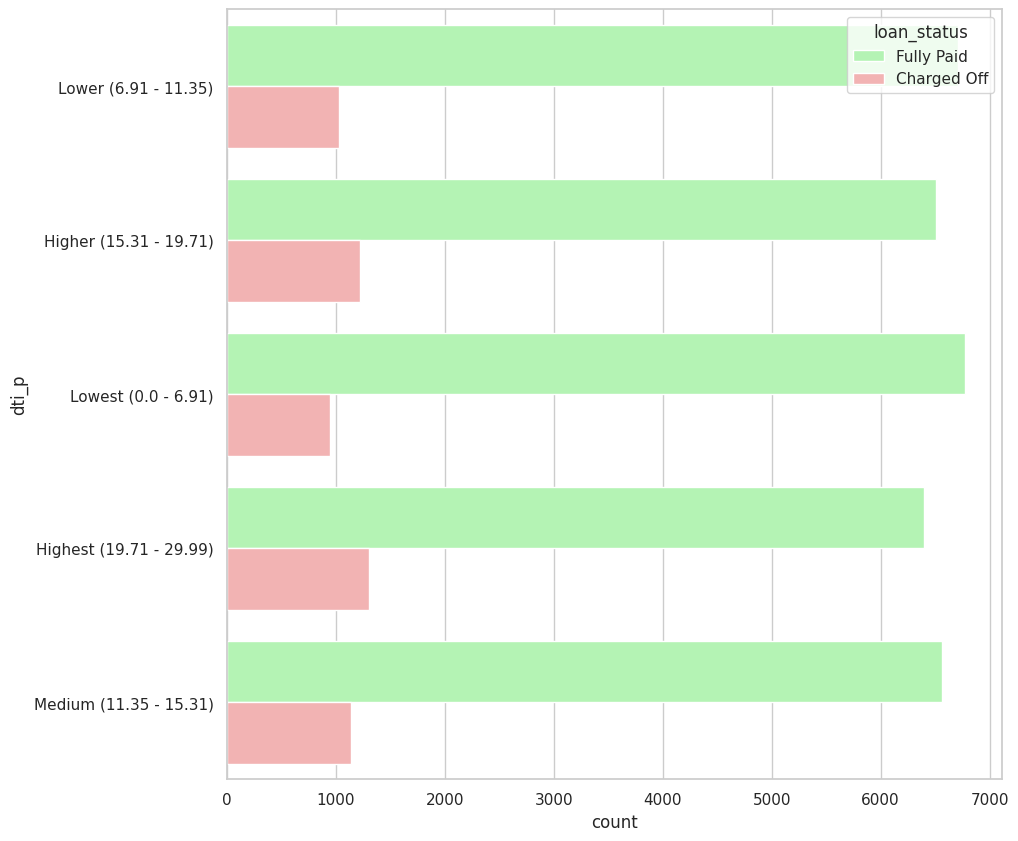

dti_p,Charged off %,Record count
Highest (19.71 - 29.99),0.168853,7699
Higher (15.31 - 19.71),0.157908,7726
Medium (11.35 - 15.31),0.147609,7696
Lower (6.91 - 11.35),0.132627,7736
Lowest (0.0 - 6.91),0.122409,7720


In [93]:
PercentileCut(column='dti')
Univariate_Categorical(column='dti_p')

##### Observation: Higher DTI ( debt to income ratio) will lead to higher charged off %

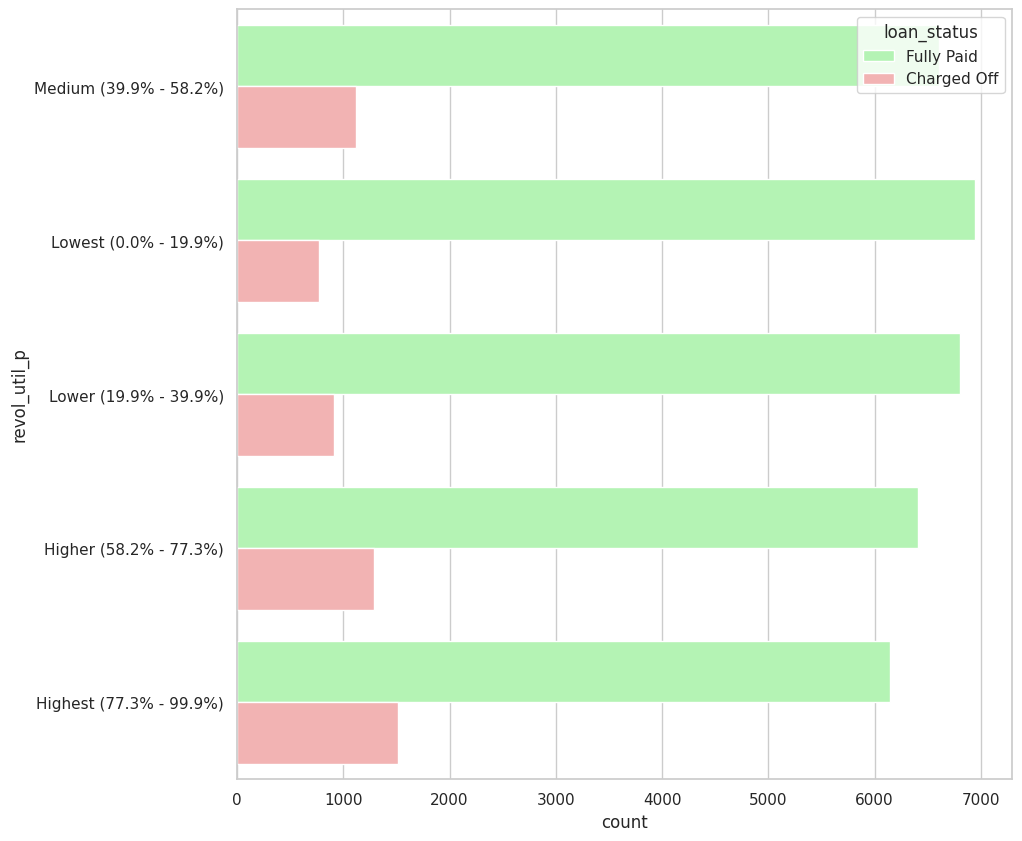

revol_util_p,Charged off %,Record count
Highest (77.3% - 99.9%),0.198069,7664
Higher (58.2% - 77.3%),0.167727,7703
Medium (39.9% - 58.2%),0.145001,7731
Lower (19.9% - 39.9%),0.118356,7714
Lowest (0.0% - 19.9%),0.099417,7715


In [94]:
PercentileCut(column='revol_util',trailer='%')
Univariate_Categorical(column='revol_util_p')

##### Observation: When the revolving line utilization rate increases, the charged off percentage rises.

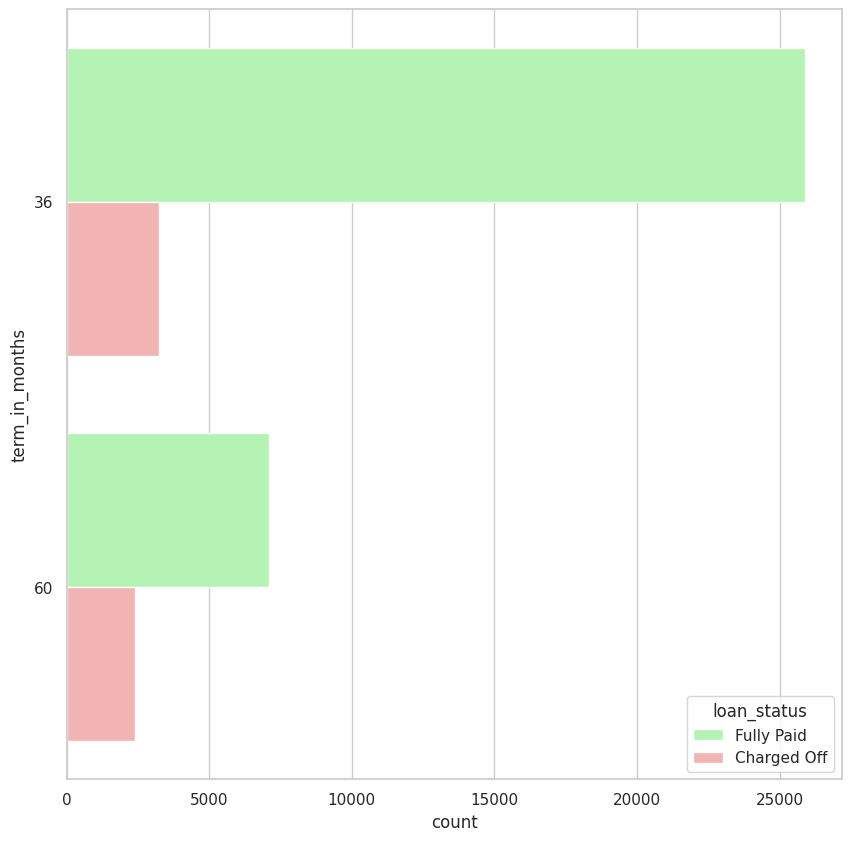

term_in_months,Charged off %,Record count
60,0.253138,9481
36,0.110909,29096


In [95]:
Univariate_Categorical(column='term_in_months')

##### Observation: For loans with 5 year repayment term, the default percent is 25%. And for 3 year loan repayment term, the default is only for 11% of the cases. Therefore, loan repayment term plays a factor in judging the default rate.

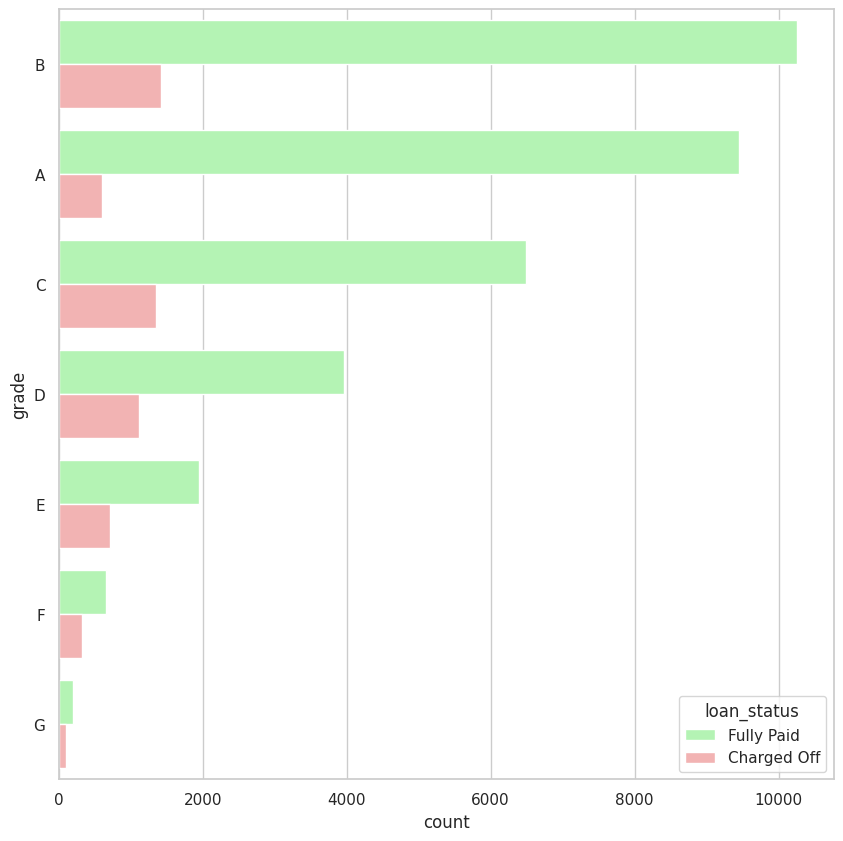

grade,Charged off %,Record count
G,0.337793,299
F,0.326844,976
E,0.268494,2663
D,0.219862,5085
C,0.171943,7834
B,0.122056,11675
A,0.059930,10045


In [96]:
Univariate_Categorical(column='grade')

##### Observation: We can clearly see that loan grades having highest default percentages. G, F, E and D form grades where default rate is much higher than others.

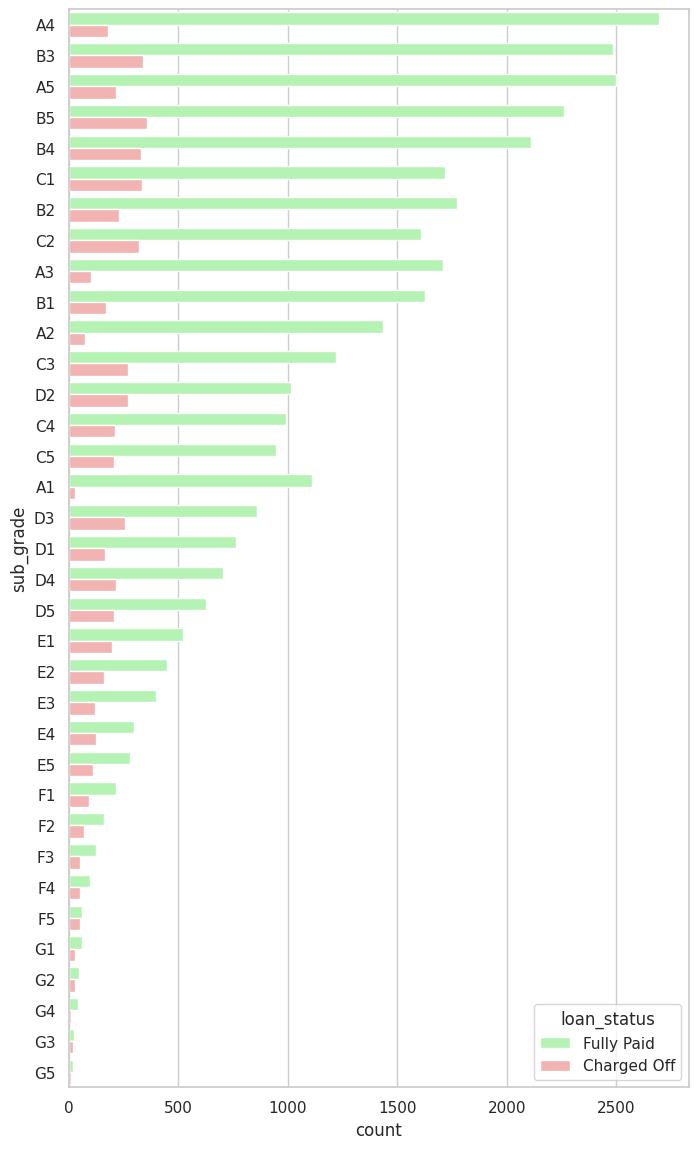

sub_grade,Charged off %,Record count
F5,0.477876,113
G3,0.422222,45
G2,0.363636,77
F4,0.350993,151
G5,0.344828,29
G1,0.329787,94
F2,0.300429,233
F1,0.298361,305
E4,0.297170,424
F3,0.293103,174


In [97]:
Univariate_Categorical(column='sub_grade', figsize=(8,14))

##### Observation: The above table shows the loan sub-grade versus the default percentage. The G3 and F5 sub categories have above 40% default rate. This field is a clear indicator of the default percent.

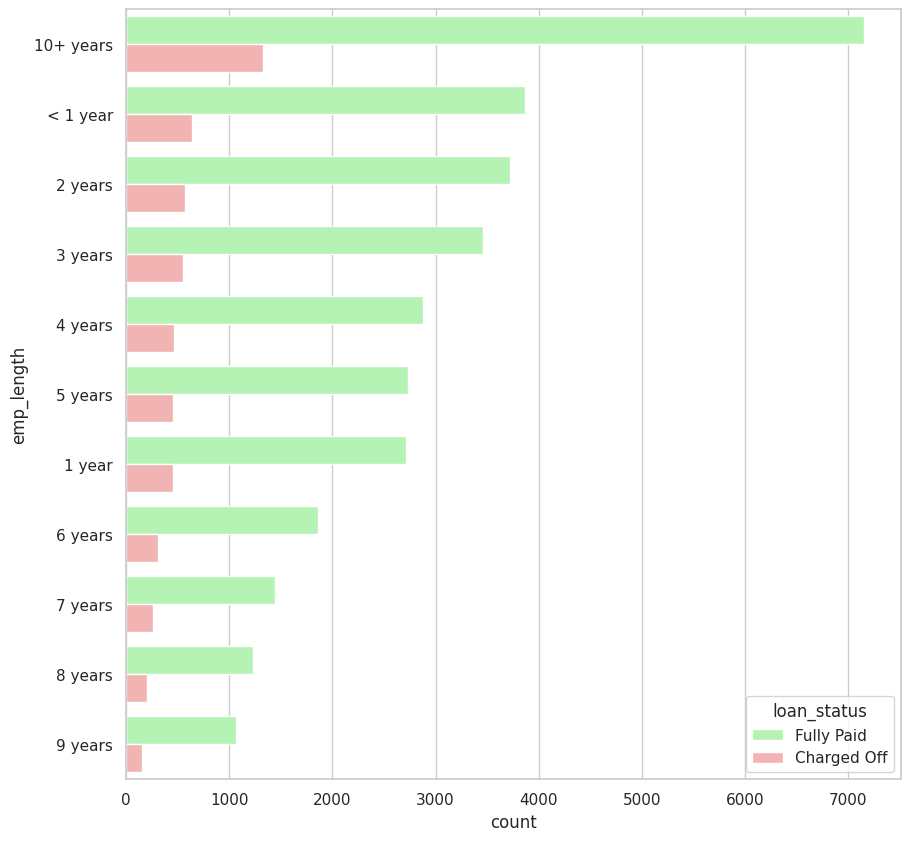

emp_length,Charged off %,Record count
10+ years,0.156810,8488
7 years,0.153711,1711
1 year,0.143894,3169
5 years,0.143394,3194
< 1 year,0.141748,4508
6 years,0.141605,2168
8 years,0.141463,1435
3 years,0.138335,4012
4 years,0.138241,3342
2 years,0.132137,4291


In [98]:
Univariate_Categorical(column='emp_length')

##### Even though the above data is inconclusive. We can imply that having no employment will lead to defaulted payment.

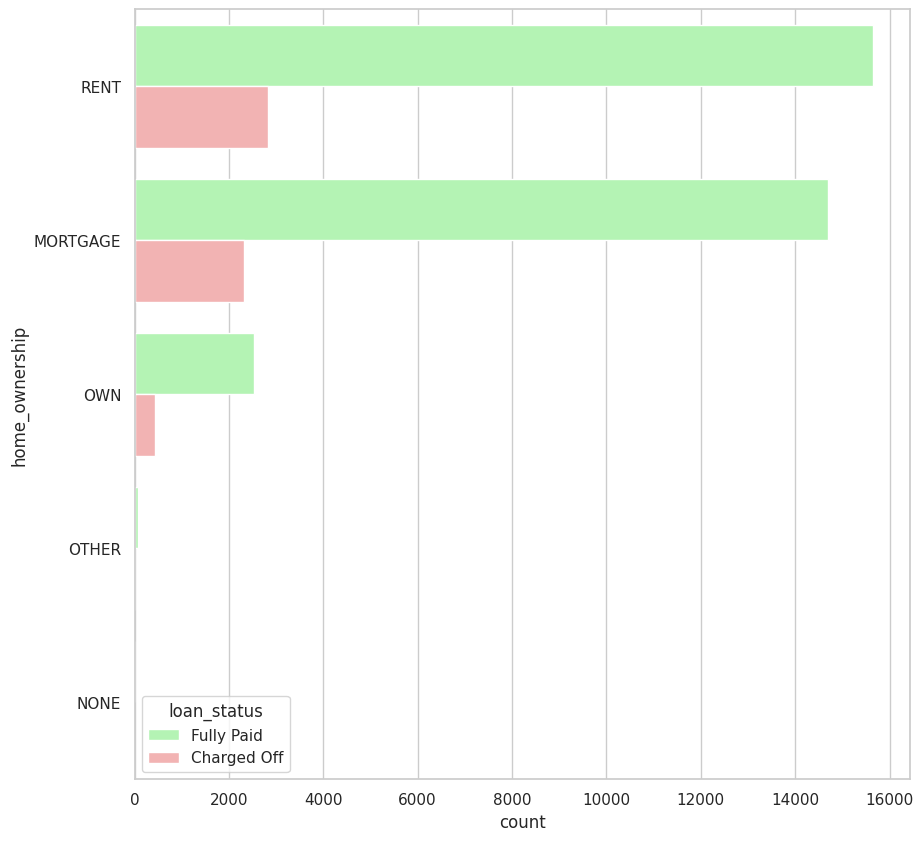

home_ownership,Charged off %,Record count
OTHER,0.183673,98
RENT,0.153626,18480
OWN,0.148908,2975
MORTGAGE,0.136713,17021


In [99]:
Univariate_Categorical(column='home_ownership')

##### Observation: Cannot make a Observation, as "OTHER" is not defined.

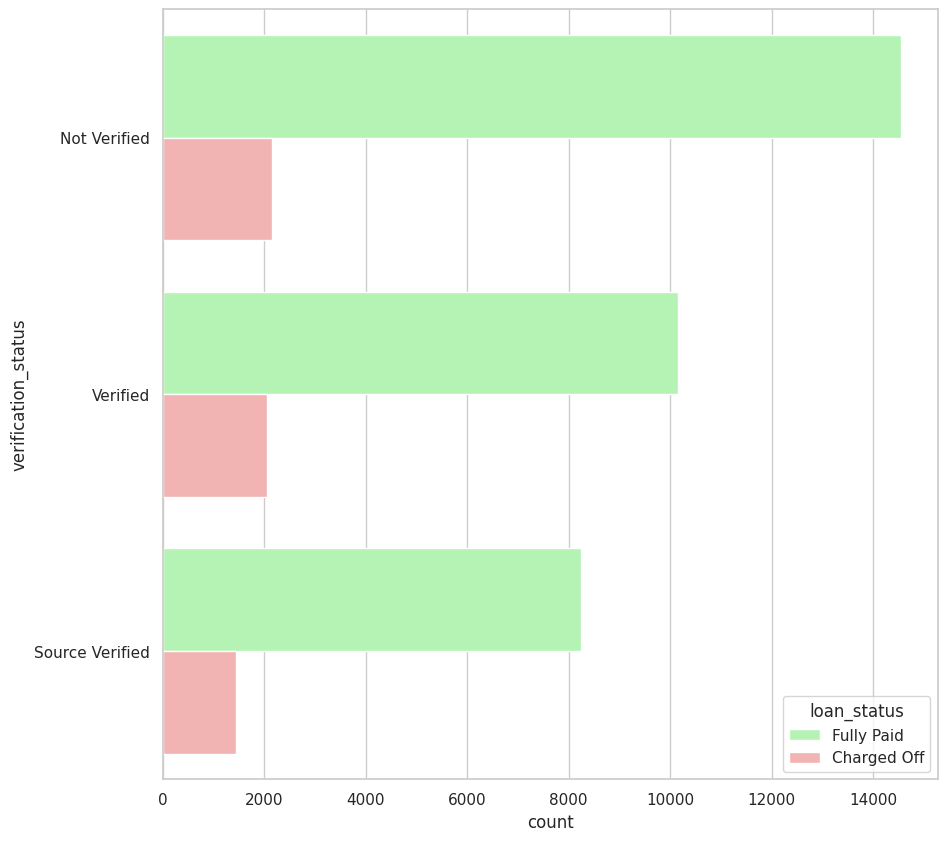

verification_status,Charged off %,Record count
Verified,0.168032,12206
Source Verified,0.148186,9677
Not Verified,0.128310,16694


In [100]:
Univariate_Categorical(column='verification_status')

##### Observation: Verified applicants have more defaulted %, which could means that the verifiaction process is not effective.


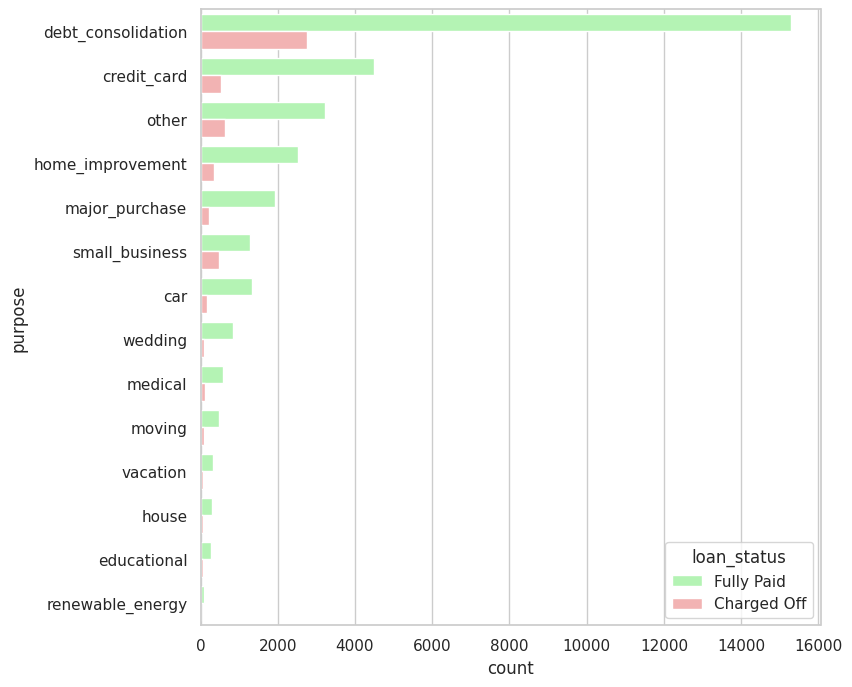

purpose,Charged off %,Record count
small_business,0.270810,1754
renewable_energy,0.186275,102
educational,0.172308,325
other,0.163777,3865
house,0.160763,367
moving,0.159722,576
medical,0.155653,681
debt_consolidation,0.153254,18055
vacation,0.141333,375
home_improvement,0.120696,2875


In [101]:
Univariate_Categorical(column='purpose', figsize=(8,8))

##### From the above analysis it is evident that the loans taken for small_business, renewable_energy and educational are the riskier ones.

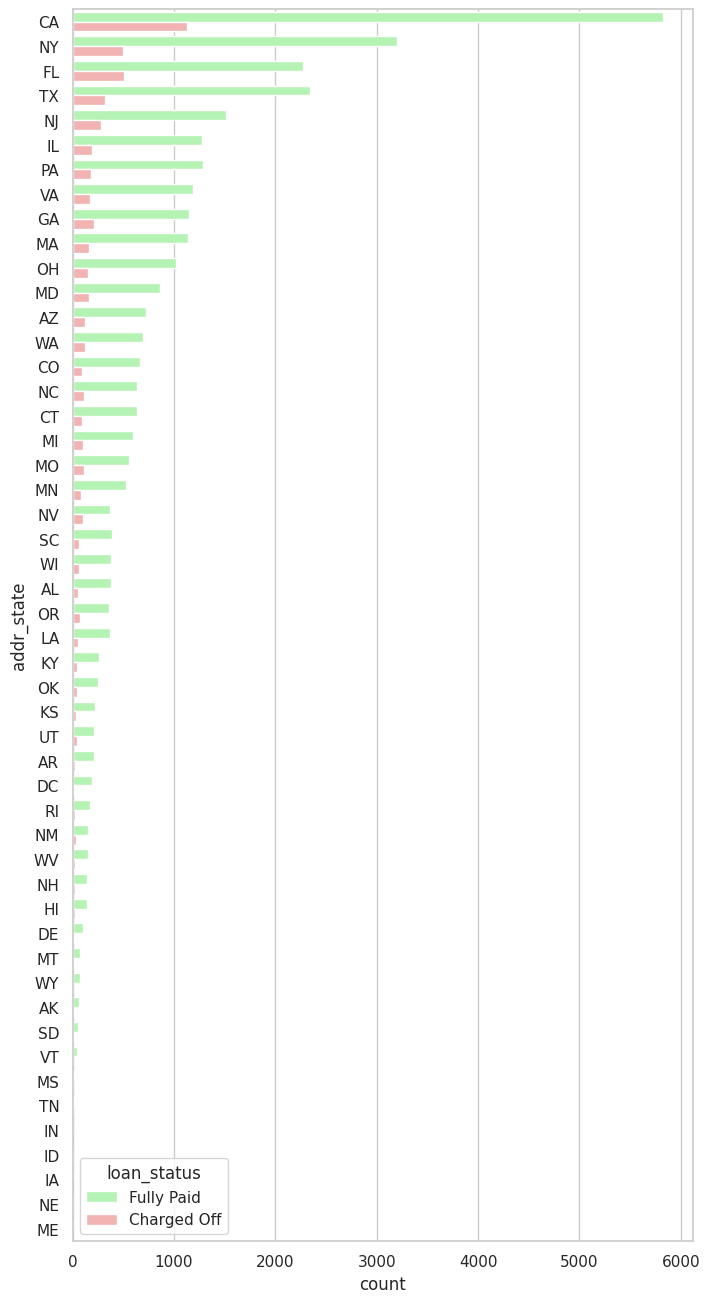

addr_state,Charged off %,Record count
NE,0.600000,5
NV,0.225470,479
SD,0.193548,62
AK,0.192308,78
FL,0.181230,2781
MO,0.170149,670
HI,0.168675,166
ID,0.166667,6
NM,0.163934,183
OR,0.163218,435


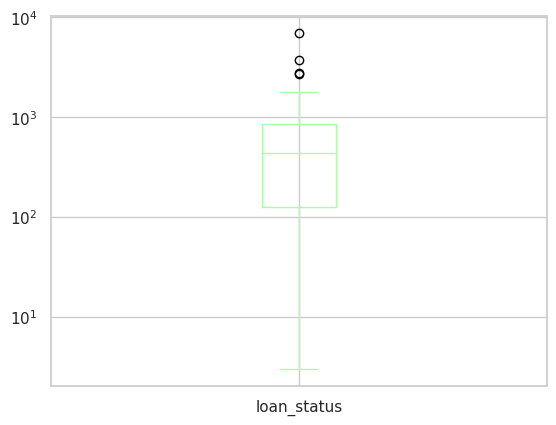

In [102]:
Univariate_Categorical(column='addr_state',figsize=(8,16), box_plot=True)

##### From the above table we can see that some of the risky states are NE, NV, SD, AK, FL, MO

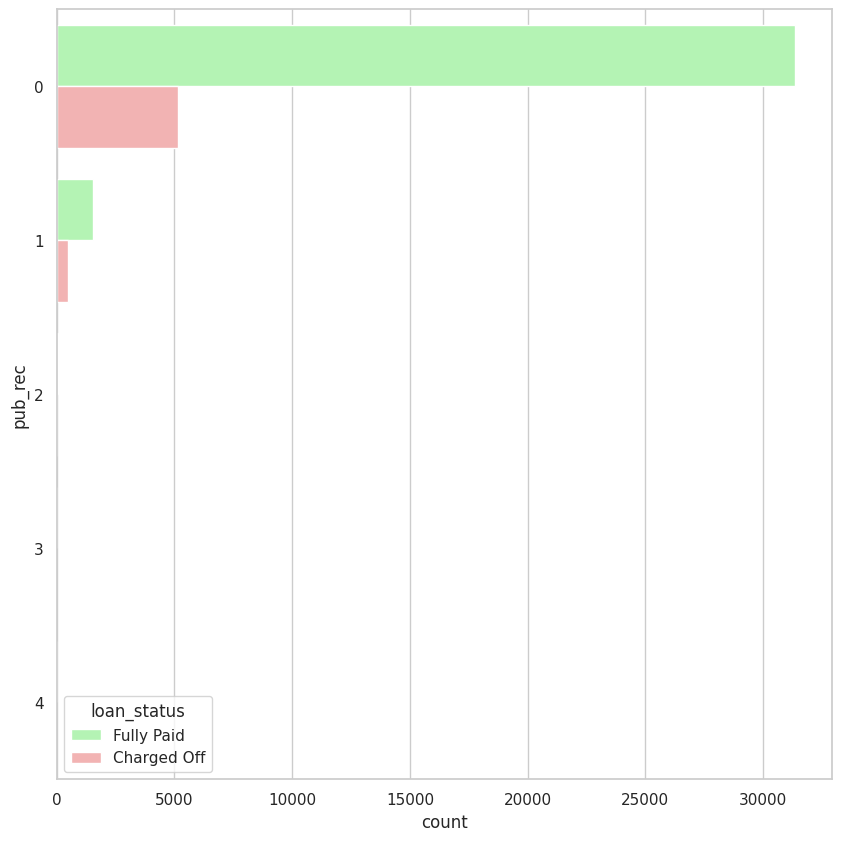

pub_rec,Charged off %,Record count
1,0.227024,2013
2,0.208333,48
0,0.141343,36507


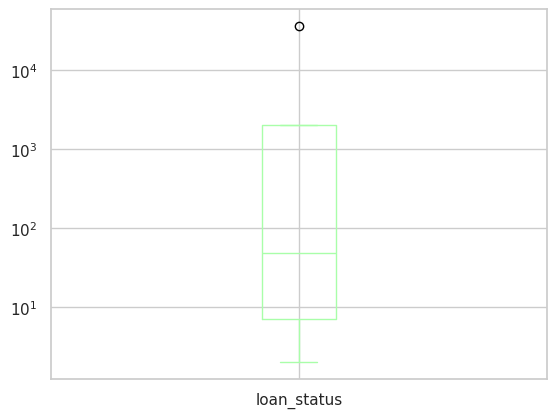

In [103]:
Univariate_Categorical(column='pub_rec', box_plot=True)

##### Observation: Above data and graph clearly shows that individuals with non-zero derogatory public records have higher chances of defaulting

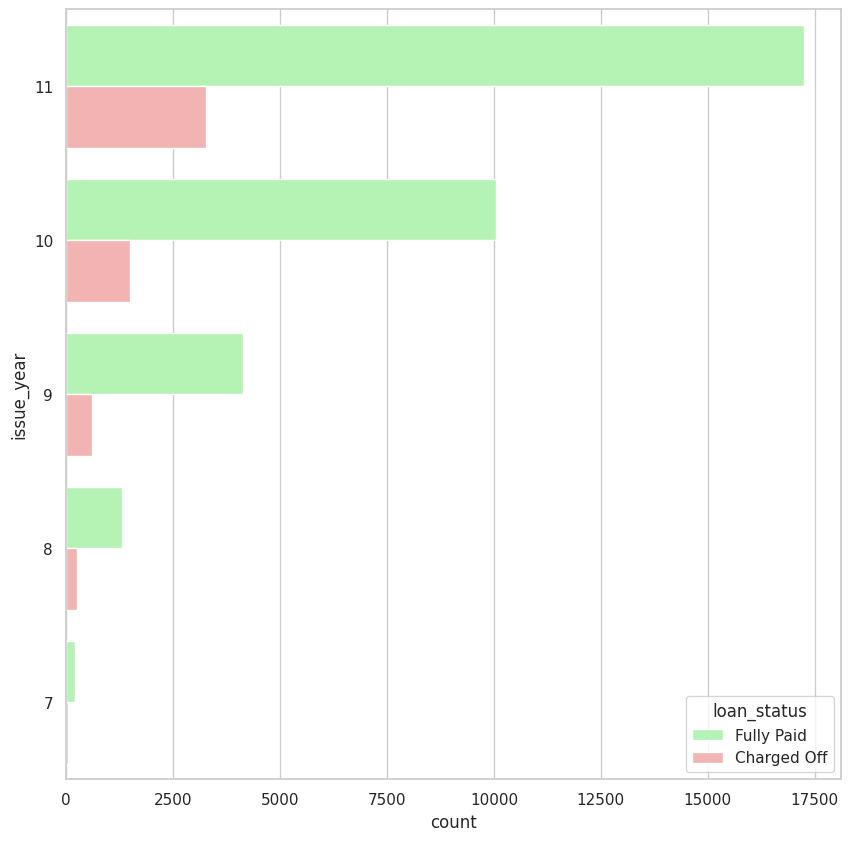

issue_year,Charged off %,Record count
7,0.179283,251
11,0.158705,20516
8,0.158131,1562
10,0.128772,11532
9,0.125954,4716


In [104]:
Univariate_Categorical(column='issue_year')

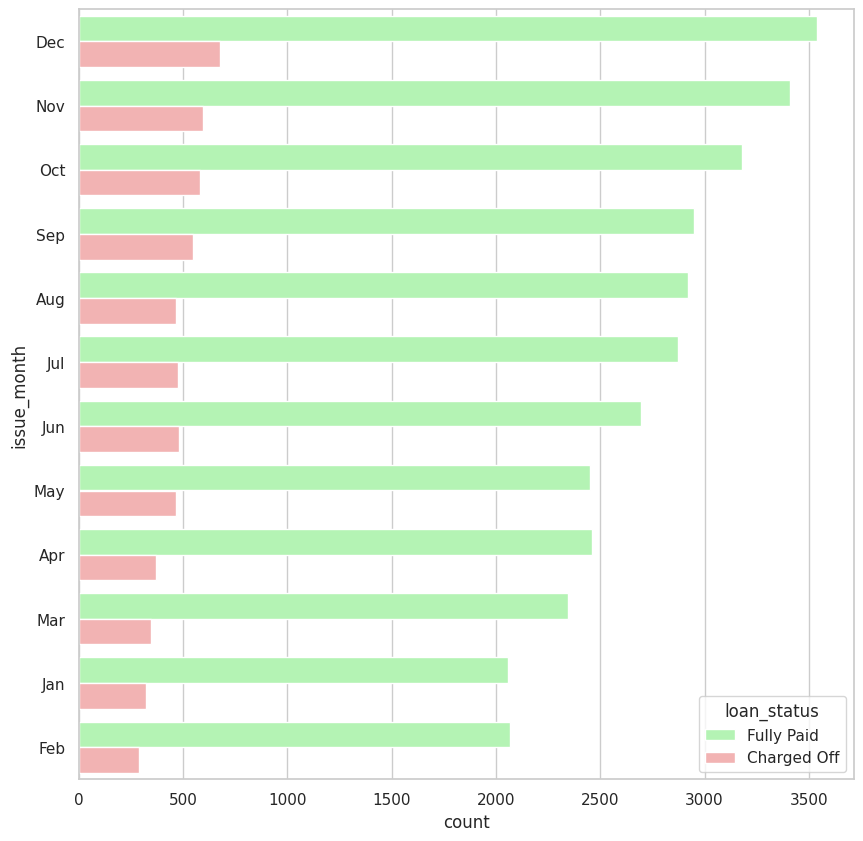

issue_month,Charged off %,Record count
Dec,0.160854,4215
May,0.159644,2919
Sep,0.156375,3498
Oct,0.154214,3761
Jun,0.151887,3180
Nov,0.149276,4006
Jul,0.142942,3351
Aug,0.138135,3388
Jan,0.134931,2379
Apr,0.130696,2831


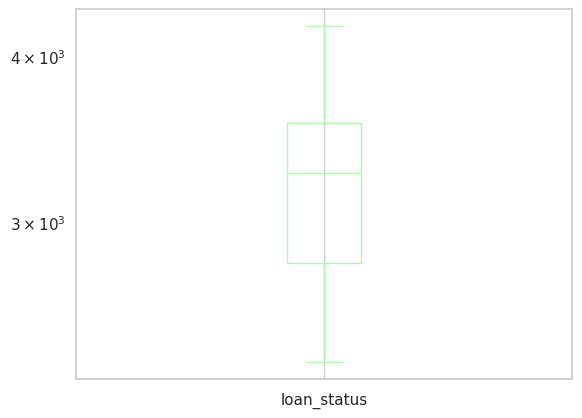

In [105]:
Univariate_Categorical(column='issue_month', box_plot=True)

##### Observation: We can clearly see December is the month which has the highest number of loan applications per year and also have the biggest default ratio. It is likely that people take a loan for travelling or socializing during Christmas and then are not able to pay back. Month of May is also another one, which is during the summer break and right before the Memorial day and Independance day breaks in US where people love to travel.

## Bivariate Analysis

Now that we have analyzed each of the variables and its impact on the loan-status, let us take group of variables together and analyze their combined effect on the loan-status. These categories are based on our business understanding. The original distribution column shows the average trend in all the data and we compare that with the data after applying our conditions.

In [106]:
def Bivariate_Analysis (*, data=df, x, y, title=None, figsize=(10,10)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a violin plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y, hue=by, split=True,
                   ax=ax, hue_order=order)
    if title is not None:
        plt.title(title)
    plt.show()

In [107]:
def Bivariate_Categorical (*, data=df, x, y, title=None, figsize=(10,10)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

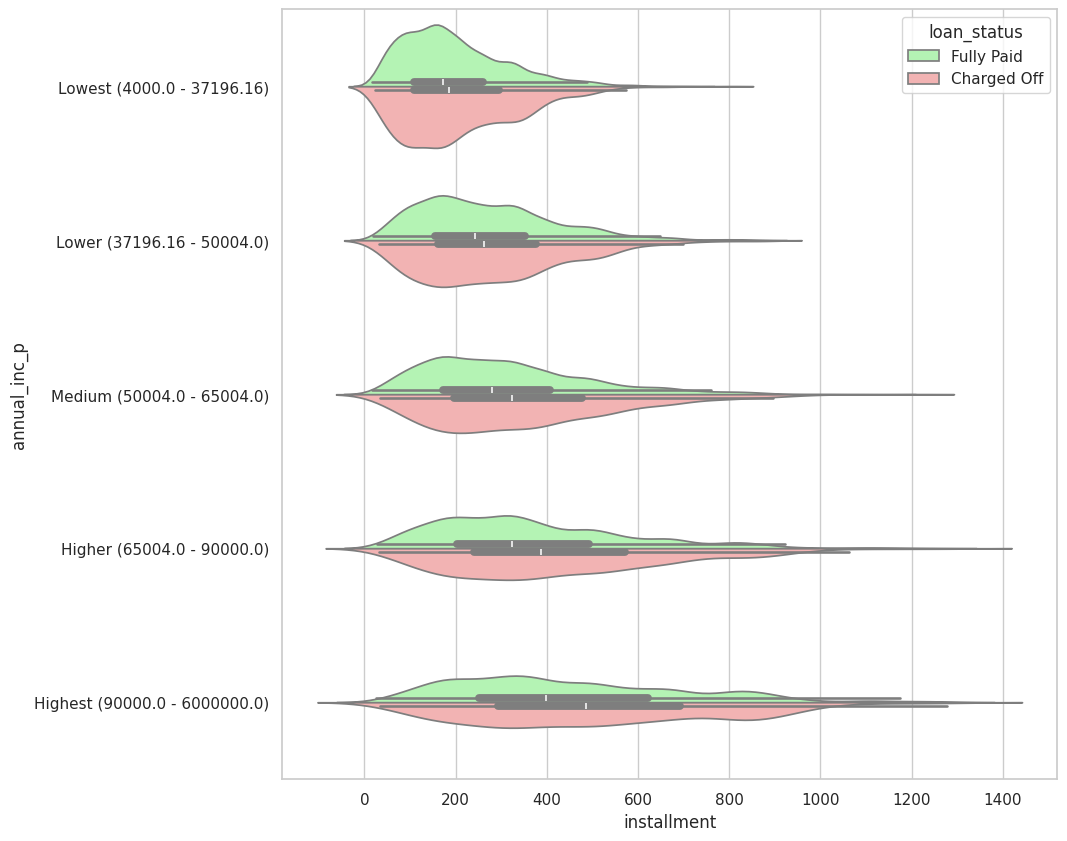

In [108]:
Bivariate_Analysis(x='installment', y='annual_inc_p')

##### Observation: Above figure shows that for higher installments for any income group have more number of defaults.

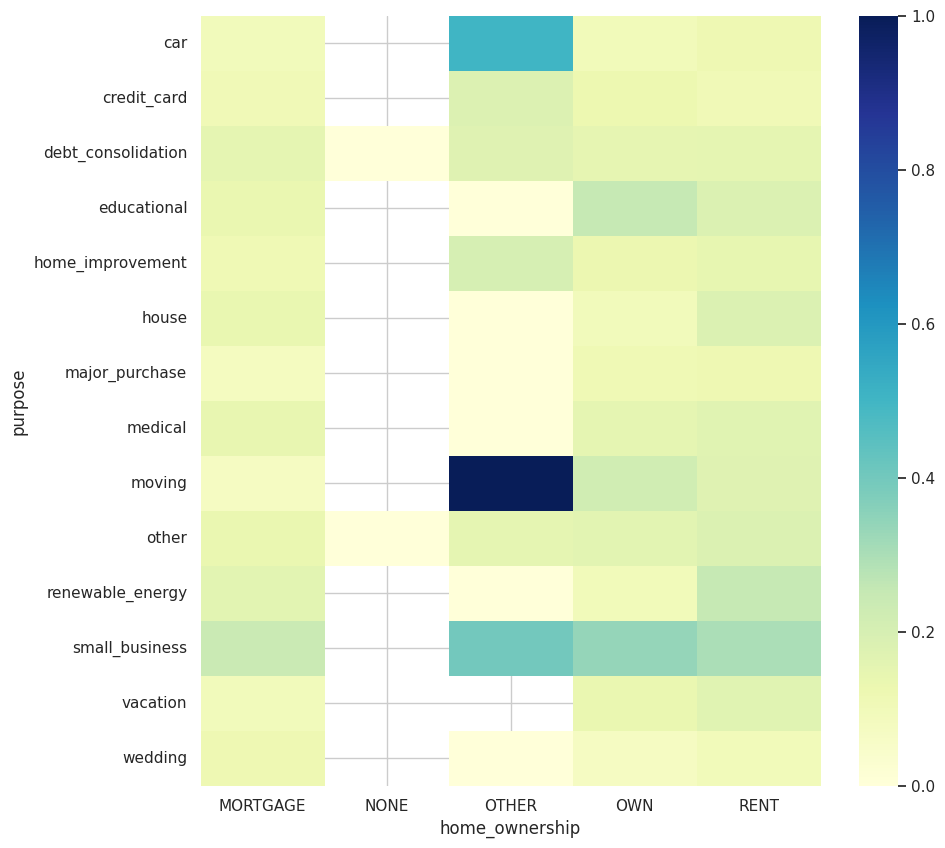

In [109]:
Bivariate_Categorical(x='home_ownership', y='purpose')

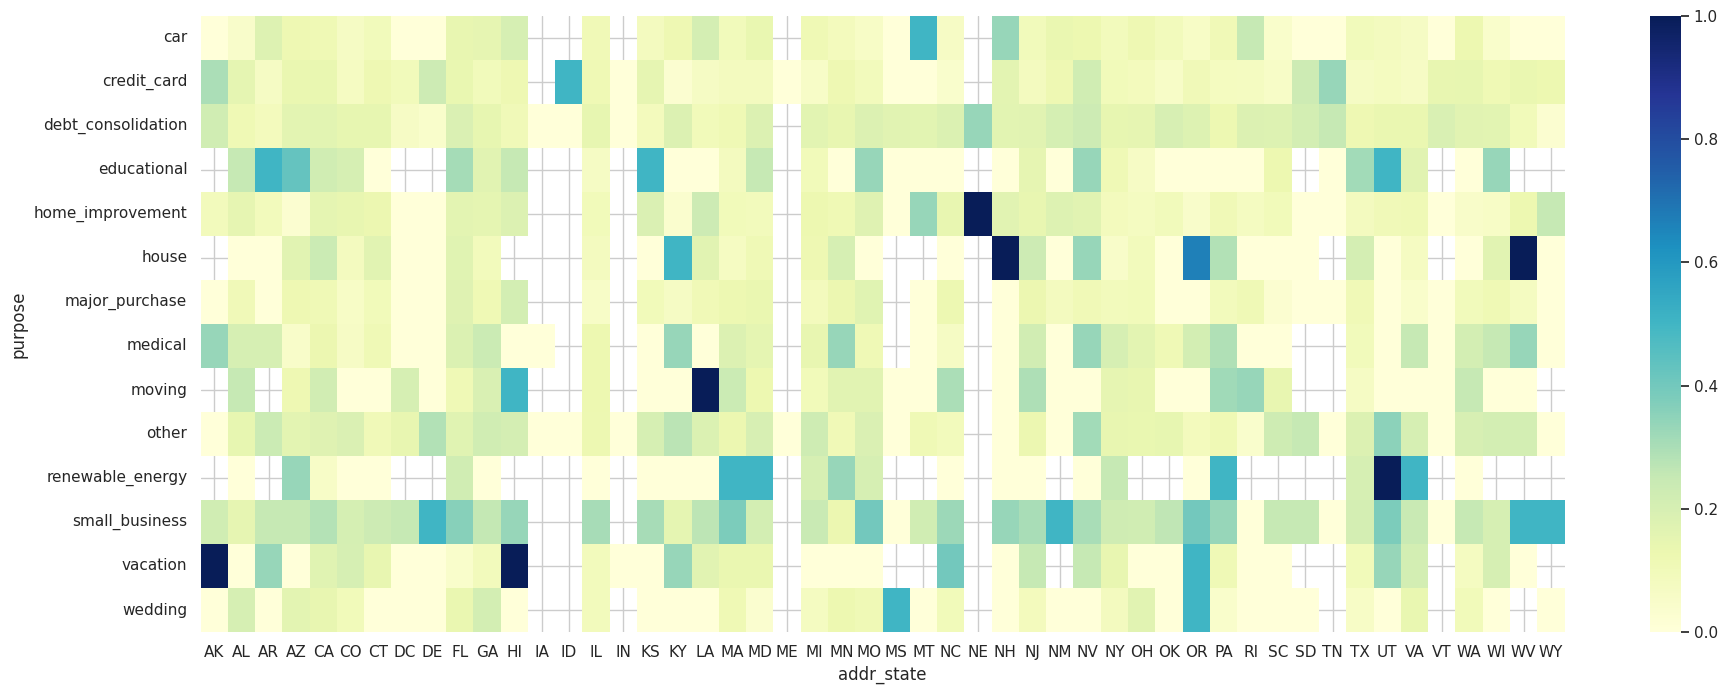

In [110]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))

##### Observation: As per the above plot, the darker the intersection of addr_state has with the purpose of the loan, the risker the loan application is. Some of the examples are below:-  vacation loans in AK, HI, OR
-  education loans in AR, KS, UT
-  small business loans in DE, NM, WV, WY
-  wedding loans in MS, OR, OR

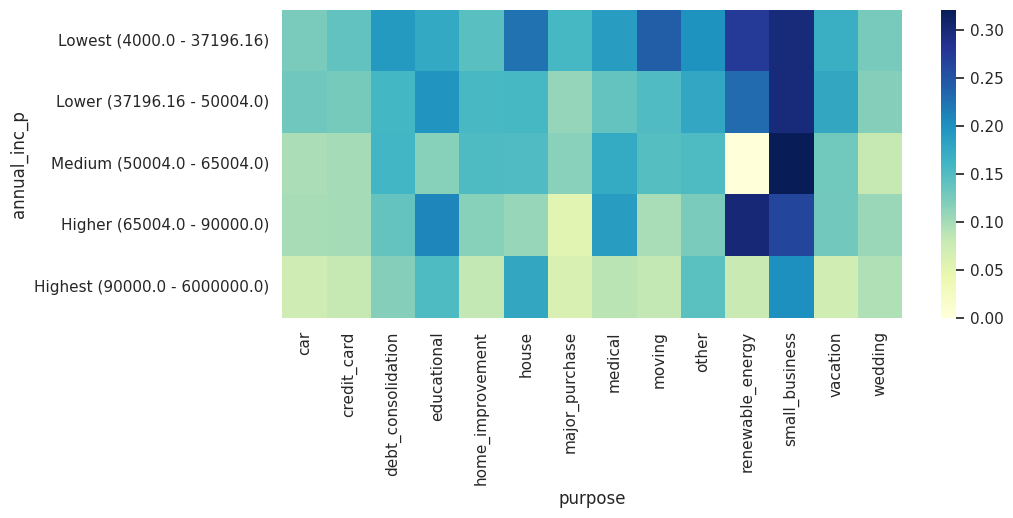

In [111]:
Bivariate_Categorical(x='purpose', y='annual_inc_p', figsize=(10,4))

##### Observation: Plot of various income groups versus purposes of loans shows the following risky loans;
-  small business loans for lowest and medium income groups
-  renewable energy loans for higher income group

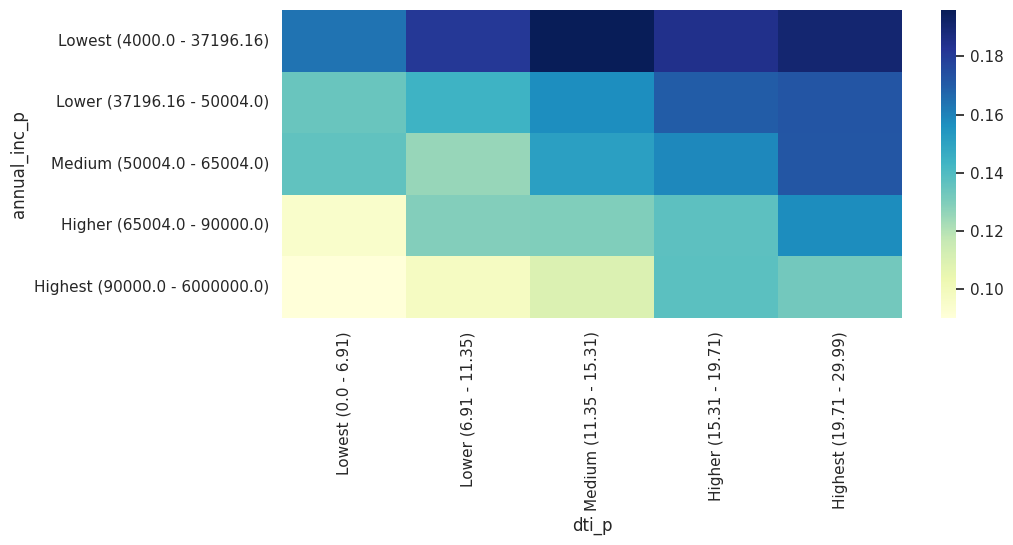

In [112]:
Bivariate_Categorical(x='dti_p', y='annual_inc_p', figsize=(10,4))

##### Observation: Medium debt-to-income group in the lowest income range is the most risky when it comes to loan repayment.


## Conclusion

From the analysis performed above we can conclude the impact of the following driving factors;


__Low to Moderate Impact__
-  Higher loan amount (above 16K)
-  Higher installment amount (above 327)
-  Lower annual income (below 37K)
-  Higher debt to income ratio (above 15%)
-  The state in which the applicant resides (NV, SD, AK, FL, etc.)
-  The month of loan issuance  (Dec, May, Sep)<br>

__High Impact__
- Higher interest rate (above 13%)
- Repayment term (5 years)
- Loan grade & sub-grade (D to G)
- Missing employment record
- Loan purpose (small business, renewable energy, educational)
- Derogatory public records (1 or 2)
- Public bankruptcy records (1 or 2)

__Combined Impact__
- High loan amount and interest rate for lower income group
- High installment and longer repayment term
- Home ownership (other) and loan purpose (car, moving or small business)
- State in which the applicant resides and loan purpose
- Income group and loan purpose

__Recommendation__

It is recommended that a portfolio and risk assessment be done using the following key influencers;
- Loan purpose
- Annual Income
- State
- Loan grade and Sub-grade
- Interest rate